In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load features from .npy files
features = []
labels = []
base_dir = r"D:\project echo\Project-Echo-main\src\Prototypes\data\mfcc_features"

for species in os.listdir(base_dir):
    species_path = os.path.join(base_dir, species)
    if os.path.isdir(species_path):
        for file in os.listdir(species_path):
            if file.endswith('.npy'):
                file_path = os.path.join(species_path, file)
                try:
                    feature = np.load(file_path)
                    if len(feature.shape) > 1:
                        feature = feature.flatten()
                    features.append(feature)
                    labels.append(species)
                except Exception as e:
                    print(f"Skipping file: {file_path}, reason: {str(e)}")

# Convert to numpy array
min_len = min(len(f) for f in features)
features = [f[:min_len] for f in features]  # Trim to minimum length
X = np.array(features)
y = np.array(labels)

print("Loaded features shape:", X.shape)
print("Loaded labels shape:", y.shape)


Loaded features shape: (7514, 403)
Loaded labels shape: (7514,)


                              precision    recall  f1-score   support

       Acanthiza chrysorrhoa       0.00      0.00      0.00         6
           Acanthiza lineata       0.50      0.14      0.22         7
              Acanthiza nana       0.65      0.67      0.66        33
           Acanthiza pusilla       0.37      0.33      0.35        54
        Acanthiza reguloides       0.39      0.54      0.45        39
       Acanthiza uropygialis       0.00      0.00      0.00         6
Acanthorhynchus tenuirostris       0.39      0.29      0.33        24
     Accipiter cirrocephalus       0.60      0.23      0.33        13
          Aidemosyne modesta       1.00      1.00      1.00         2
             Alauda arvensis       0.33      0.25      0.29         4
     Anhinga novaehollandiae       0.00      0.00      0.00         1
         Anthochaera phrygia       0.00      0.00      0.00         3
          Antigone rubicunda       0.00      0.00      0.00         3
            Artamus

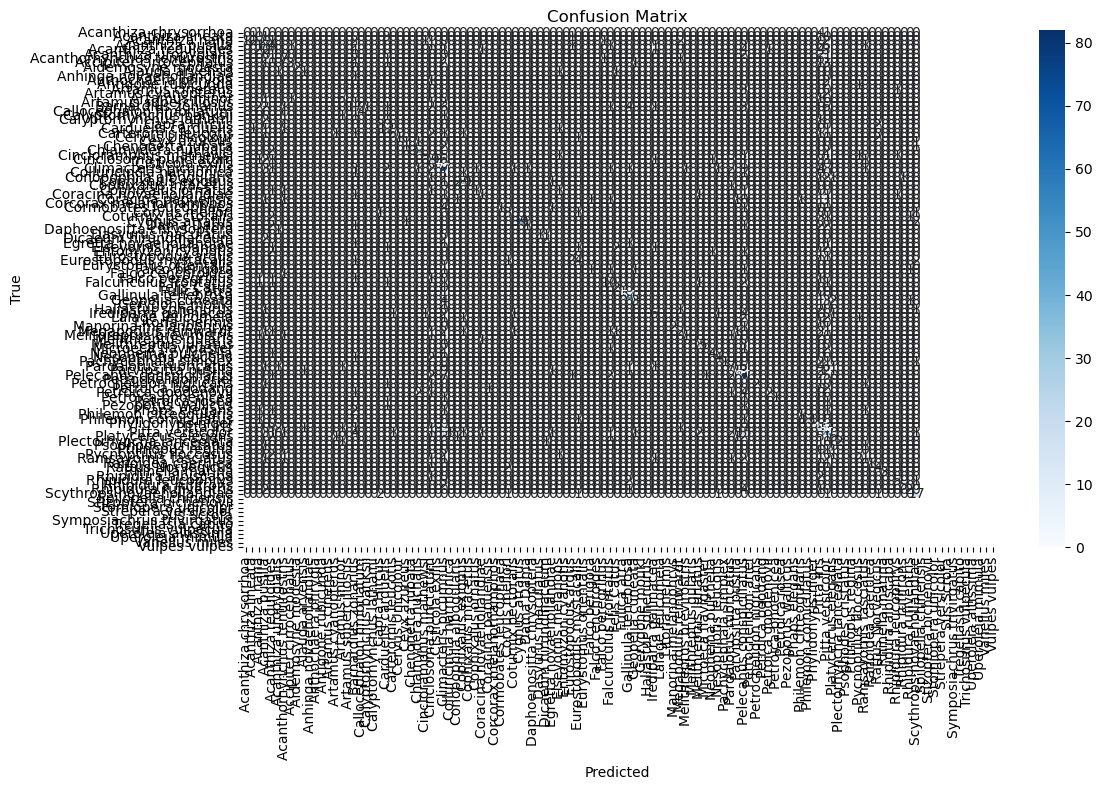

In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
